In [1]:
import sympy as sp
import numpy as np
from scipy.integrate import quad
from scipy.stats import norm
import matplotlib.pyplot as plt
from sympy.utilities import lambdify
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [2]:
sp.init_printing()

In [3]:
x = sp.Symbol('x', real=True)
k = sp.Symbol('k', real=True, positive=True)
a = sp.Symbol('a', real=True)
m = sp.Symbol('m', real=True, positive=True)
t = sp.Symbol('t', real=True, positive=True)
h = sp.Symbol('hbar', real=True, positive=True)
n = sp.Symbol('n', integer=True, nonzero=True)
psi = sp.Function('psi')

x, k, a, m, t, h, n, psi(x)

In [4]:
eq = sp.Eq(psi(x).diff(x, x), -k**2 * psi(x))

In [5]:
sol = sp.dsolve(eq, psi(x), ics={psi(0): 0})

In [6]:
sol = sol.subs(k, n * sp.pi / a)

In [7]:
sol = sol.subs(sp.Symbol('C1'), sp.sqrt(2 / a))

$$\sigma_X^2=<x^2>-<x>^2$$

$$<p>=?$$
$$<p^2>=?$$
$$\sigma_P^2=?$$

$$\sigma_X \sigma_P \geq \frac{\hbar}{2}$$

Spradzić, czy ta zasada nieoznaczoności jest faktycznie dla tej studni potencjału spełniona.

# Rozwiazanie

### Wyliczenie połozenia

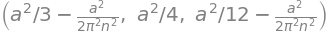

In [8]:
Xx=sp.integrate(sol.rhs * x**2 * sol.rhs, (x, 0, a)).simplify()
X_squared=sp.integrate(sol.rhs * x * sol.rhs, (x, 0, a)).simplify()**2
sigma_X_squared=Xx-X_squared
Xx,X_squared,sigma_X_squared

### Wyliczenie pędu

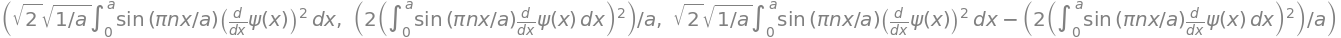

In [9]:
Pp=sp.integrate(sol.rhs * psi(x).diff(x)**2, (x, 0, a)).simplify()
P_squared=sp.integrate(sol.rhs * psi(x).diff(x), (x, 0, a)).simplify()**2
sigma_P_squared=Pp-P_squared

Pp,P_squared,sigma_P_squared

### Sprawdzenie nierówności Heisenberga

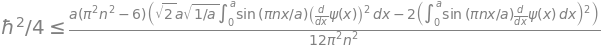

In [10]:
check = sigma_X_squared * sigma_P_squared >= h**2 / 4
check.simplify()